!["./Screenshot 2025-11-03 145507.jpg"](Screenshot%202025-11-03%20145507.jpg)

!["Screenshot question 1"](question1.jpg)





As we see with question 1.1, when the coordinate system (S,T) is orthogonal the x-component of q in the direction of s only relies on a and y-component q in the direction of t only relies on b. When the coordinate system (U,V) is not orthogonal, such as in 1.2, there is a dependency between the axes, meaning we cannot compute the U component of q without considering V or vice versa.  


there is a clearer version of q1 in a file named q1.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True, precision=3)

C:\Users\brean\AppData\Local\Temp\ipykernel_8800\1084949625.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2. Write your own class in Python to perform PCA analysis. Require that your input data
follow the format where rows are samples and columns are variables. Your function
should do the following:
1. Do mean-centering.
2. Compute the covariance matrix using numpy.cov().
3. Perform eigen-decomposition using numpy.linalg.eig().
4. Project the data onto the principal component axes.
5. Return the variance and percent variance that each PC explains, all of the scores,
and loadings.

In [2]:
def mean_centering(df):
    for variable in df.columns:
        df[variable] = df[variable] - np.mean(df[variable])



Covariance matrix

$cov(x,y) = \frac{ \sum (x_i-x̄)(y_i-ȳ) }{n-1}$

$var(x) = \frac{ \sum (x_i-x̄)^2 }{n-1}$

In [3]:
class MyPCA:

    """Calculate the PCA for mean centered data"""
    def __init__(self, x):
        self.x = x
        self.covariance_matrix: np.array = None
        self.variance: np.array = None
        self.principal_components: np.array = None
        self.projections: np.array = None

    def covariance(self):
        # self.covariance_matrix = np.cov(self.x)
        matrix_copy = self.x.copy()
        variable_means = [np.mean(column) for column in matrix_copy] ## should be near 0 since we mean centered
        
        for index, mean in enumerate(variable_means):
            matrix_copy[index] = matrix_copy[index] - mean
        cov = []

        for column in matrix_copy:
            column_list = []
            for column2 in matrix_copy:
                # column_list.append( round( sum(column * column2)/ (len(column) - 1), 8 )  )
                column_list.append( sum(column * column2)/ (len(column) - 1)  )

            cov.append(column_list)

        self.covariance_matrix = cov

    def compute_eigens(self):
        """1. Eigenvalue decomposition
           2. Ensures the eigenvalues and eigenvectors are ordered."""
        if not self.covariance_matrix:
            self.covariance()
        vals, vec = np.linalg.eigh(self.covariance_matrix)
        # sorted_vals = []
        # max = vals[0]
        # vals = [6,17,18,18,100,4,3,0]
        index = vals.argsort()[::-1]
        self.variance = vals[index]
        self.principal_components = (vec[:, index]).T
    
    def percent_variance_explained(self):
        if self.variance is None:
            self.compute_eigens()

        return self.variance/sum(self.variance) * 100
    
    def projection(self):
        """Compute Y = X*P aka project the principal components onto X"""
        if self.variance is None:
            self.compute_eigens()

        self.projections = np.dot(self.x.T, self.principal_components.T)
    
    def scree_plot(self):
        if self.variance is None:
            raise Exception("Do eigendecomposition first.")
        variance = self.percent_variance_explained()
        x_axis = np.array(["PC "+str(i+1) for i in range(len(variance))])   
        
        plt.plot(x_axis, variance, linestyle = "-", marker = "o", label = "PC")
        plt.title("scree plot")
        plt.legend()
        plt.show()

    def loading_plot(self, columns):   
        # Extract PC1 and PC2 loadings
        pc1 = self.principal_components[0] * -1  # PC1 loadings (one per variable)
        pc2 = self.principal_components[1]  # PC2 loadings (one per variable)

        plt.figure(figsize=(8, 8))

        # Plot points for loadings
        plt.scatter(pc1, pc2, color='red')

        # Annotate variable names
        for i, feature in enumerate(columns):
            plt.annotate(feature,
                        (pc1[i], pc2[i]),
                        textcoords="offset points",
                        xytext=(5, 5),
                        ha='left',
                        color = "red")

        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Loadings Plot")

        # Axes centered for PCA visualization
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

        # Fix axis limits
        # plt.xlim(-1, 1)
        # plt.ylim(-1, 1)

        plt.grid(True)
        plt.show()
        

    def scores_plot(self):
        if self.projections is None:
            raise ValueError("Compute projections first.")
        
        percent_variance = self.percent_variance_explained()
        projections = self.projections.T
        plt.scatter(projections[0], projections[1])
        plt.title("scores plot")
        plt.xlabel(f'PC 1 ({round(percent_variance[0],1)}%)')
        plt.ylabel(f'PC 2 ({round(percent_variance[1],1)}%)')
        plt.show()



# 3. (20 points)
Apply your own PCA function to the dataset “Homework 2 dataset prob3.csv”. In this
dataset, columns correspond to variables.
- Plot the scores plot.
- Do you see a clear separation of the raw data?
- Can you still separate them after you project your raw data onto your first principal component?
- What message can you get from this observation?
- What is the variance of the projections on PC1 and PC2. What is the relationship
between these variances and the eigenvalues of your covariance matrix?

In [4]:
df = pd.read_csv("data/Homework_2_dataset_prob3.csv")
mean_centering(df)

matrix = df.to_numpy()



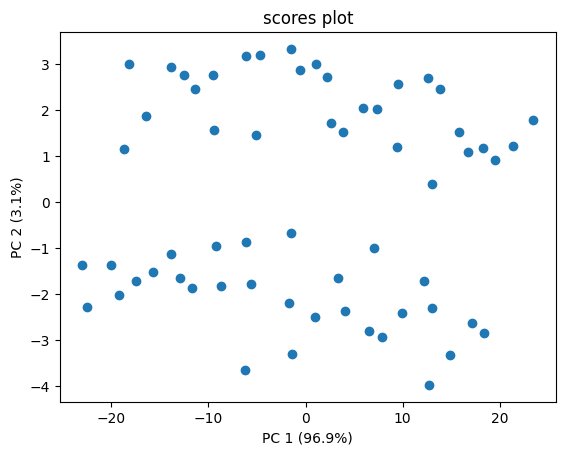

In [5]:
pca_matrix = MyPCA(x = matrix.T)

pca_matrix.compute_eigens()
pca_matrix.projection()

pca_matrix.scores_plot()



### Do you see a clear separation of the raw data?

The plot of the raw data

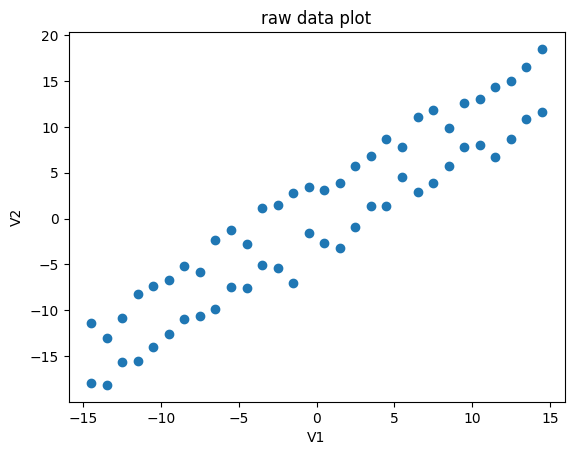

In [6]:
plt.scatter(df.V1, df.V2)
plt.title("raw data plot")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

The plot of the raw data has some separation. We can draw a line which separates the data into two groups.

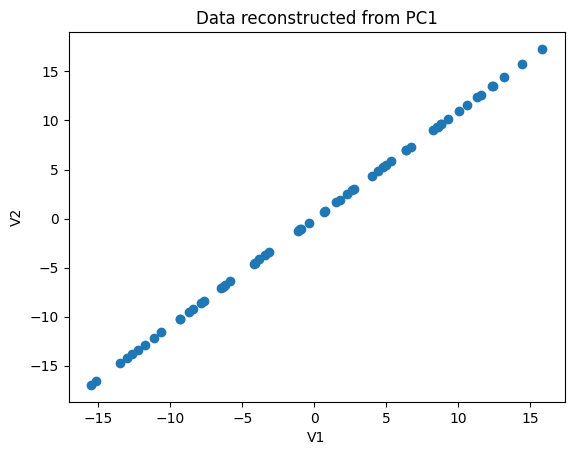

In [7]:
matrix1 = np.atleast_2d(pca_matrix.principal_components[0]).T
matrix2 = np.atleast_2d(np.matmul( matrix, pca_matrix.principal_components[0] )) ## np.atleast_2d(pca_matrix.projections.T[0]) 

pc1_projected = np.matmul(matrix1 , matrix2 )
pc1_projected.shape

plt.scatter(pc1_projected[0], pc1_projected[1])
plt.title("Data reconstructed from PC1")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

### - Can you still separate them after you project your raw data onto your first principal component?
After reconstructing the data, the data is not separatable since we removed all the noise/information about separation. 
### - What message can you get from this observation?

The lack of separation in the data after reconstruction tells me I perserved variance by keep PC1 but the information about separation between the two groups was lost with the removal of PC2.

### - What is the variance of the projections on PC1 and PC2. What is the relationship between these variances and the eigenvalues of your covariance matrix?

For mean-centered data, the variance of the projections onto a principal component equals the corresponding eigenvalue of the covariance matrix. So, since my PC1 and PC2 variances are 161.041 and 5.125, those are the eigenvalues for PC1 and PC2.

In [8]:

print(f"covariance matrix: { np.cov( pca_matrix.projections.T) }\neigenvalues: {pca_matrix.variance}")

covariance matrix: [[161.041   0.   ]
 [  0.      5.125]]
eigenvalues: [161.041   5.125]


# 4. (20 points)
Apply your own PCA function to the dataset “Homework 2 dataset prob4.csv”. In
this dataset, rows correspond to different variables and columns correspond to different
samples. You will need to transpose it before PCA analysis because your own PCA
function requires columns to be variables. Plot the scree plot for PC1 and PC2 and
indicate the percentage of variance that PC1 and PC2 explains respectively. Also plot
the scores plot and loadings plot.

In [9]:
df2 = pd.read_csv("data/Homework_2_dataset_prob4.csv", sep = ",").transpose()
# Set the first row (original column names) as new column headers
new_columns = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_columns

mean_centering(df2)

matrix2 = df2.to_numpy().astype(float)

df2

ComponetID,v1,v5,v17,v51,v68,v79,v117,v118,v132,v138,...,v4681,v4686,v4690,v4700,v4711,v4762,v4779,v4816,v4821,v4888
s 1,4933.5,36121.7,-72939.65,8321.85,-4717.1,50269.8,-317464.7,41876.25,2242.45,668.6,...,-3178.05,895.7,-501.45,-1793.4,-56926.15,-4971.5,-64685.8,-880.2,-4588.85,-96200.5
s 3,7303.5,54158.7,-41452.65,10524.85,-4717.1,-5587.2,-640863.7,-86652.75,2100.45,-8009.4,...,-2659.05,-9173.3,-518.45,-1793.4,-81471.15,-7772.5,-138178.8,-880.2,-4588.85,-19361.5
s 5,11620.5,31417.7,13016.35,7061.85,220.9,29224.8,331029.3,4948.25,1349.45,-515.4,...,4597.95,-9173.3,5455.55,778.6,-62376.15,-9147.5,-106015.8,1375.8,4592.15,-4697.5
s 7,7079.5,102689.7,-72939.65,9604.85,-167.1,-23231.2,-277508.7,-43576.75,474.45,-10433.4,...,6241.95,9445.7,-6328.45,-343.4,-64239.15,-6792.5,-92381.8,-880.2,-1159.85,58987.5
s 9,5698.5,136981.7,-72939.65,-3670.15,1756.9,18322.8,136149.3,99091.25,1922.45,1073.6,...,9403.95,22210.7,-6328.45,-1793.4,-96387.15,-7760.5,-81481.8,732.8,6381.15,708677.5
s11,12204.5,-126830.3,-1626.65,-8636.15,965.9,-5606.2,-572558.7,-113603.75,2460.45,1464.6,...,7861.95,10166.7,-6328.45,2309.6,99552.85,6335.5,100978.2,-880.2,-2892.85,102789.5
s13,-8215.5,-74496.3,82047.35,6754.85,308.9,-23021.2,-114402.7,-113603.75,-4215.55,-3002.4,...,3508.95,-4643.3,-964.45,-1793.4,94692.85,9647.5,172615.2,316.8,3544.15,-75071.5
s15,1230.5,128313.7,-72939.65,-9391.15,2245.9,6850.8,820536.3,40323.25,-4215.55,-1764.4,...,5203.95,9512.7,-6328.45,-1793.4,136215.85,7784.5,158120.2,632.8,-4588.85,-69339.5
s17,-8215.5,-126830.3,40798.35,1395.85,3998.9,-45815.2,2074.3,86886.25,-4215.55,-3846.4,...,955.95,-3056.3,2922.55,-1793.4,-44526.15,-1420.5,-58522.8,-880.2,-4588.85,24292.5
s19,-8215.5,121973.7,-72939.65,10430.85,1062.9,-21023.2,-268793.7,13042.25,2586.45,615.6,...,5747.95,-9173.3,3941.55,975.6,-88534.15,-9075.5,-127459.8,691.8,41.15,97535.5


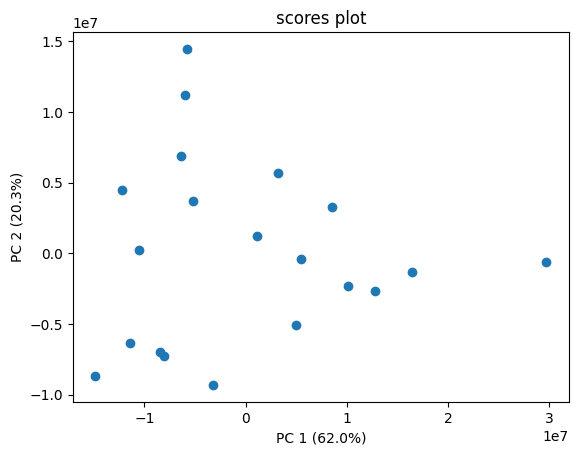

In [10]:
df2 = pd.read_csv("data/Homework_2_dataset_prob4.csv", sep = ",").transpose()
# Set the first row (original column names) as new column headers
new_columns = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_columns

mean_centering(df2)

matrix2 = df2.to_numpy().astype(float)

pca_matrix2 = MyPCA(x = matrix2.T)


pca_matrix2.compute_eigens()
pca_matrix2.projection()

pca_matrix2.scores_plot()





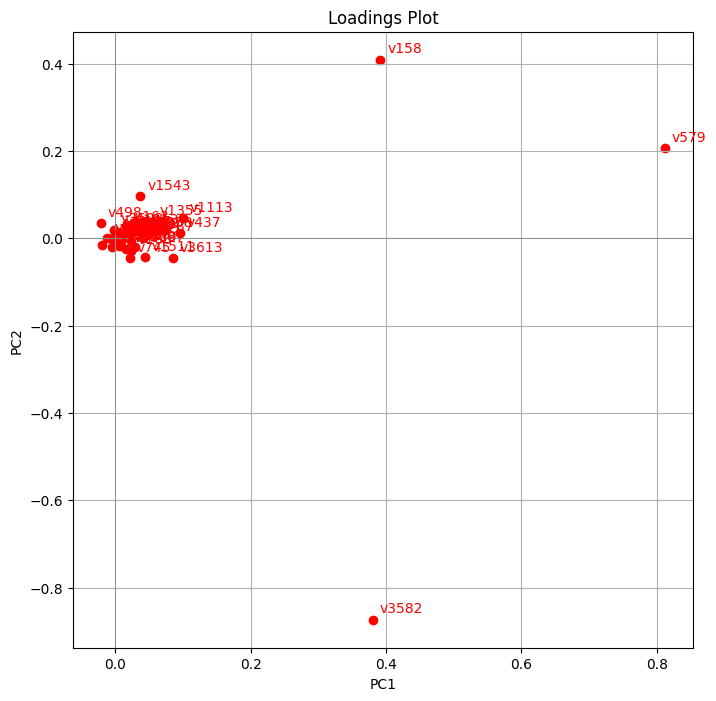

In [11]:
pca_matrix2.loading_plot(df2.columns)

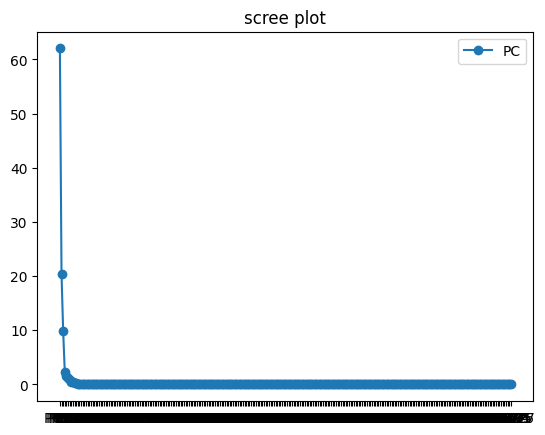

The percentage of variance that PC1 and PC2 respectively explain are:


array([62.017, 20.325])

In [12]:
pca_matrix2.scree_plot()

print("The percentage of variance that PC1 and PC2 respectively explain are:")
pca_matrix2.percent_variance_explained()[0:2]